# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
#Import necessary models
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
#Read Dataset
X = pd.read_csv('3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.describe()

,lat,lon,alt
count,10000.000000,10000.000000,10000.000000
mean,9.720130,57.077939,22.259654
std,0.630799,0.288816,18.595995
min,8.146664,56.584513,-1.724164
25%,9.327763,56.841226,7.122218
50%,9.883242,57.039543,17.600544
75%,10.158706,57.296597,32.041836
max,11.196113,57.744022,129.286451


In [3]:
#Normalize the data
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()
XX.describe()

,lat,lon,alt
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.278977e-17,2.366107e-16,-1.818989e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.494402e+00,-1.708442e+00,-1.289730e+00
25%,-6.220163e-01,-8.195985e-01,-8.140159e-01
50%,2.585797e-01,-1.329426e-01,-2.505437e-01
75%,6.952713e-01,7.570810e-01,5.260370e-01
max,2.339863e+00,2.306250e+00,5.755368e+00


In [4]:
#generate arrays for minimum samples and epsilons
min_samples = np.arange(1, 11)
epsilons = np.arange(0.05, 0.51, 0.01)

In [5]:
#generate scores using 'for' loop

all_scores = []
for min_sample in min_samples:
    
    scores = []
    for epsilon in epsilons:
        
        # define DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        
        # calculate silouette score
        score = metrics.silhouette_score(XX[['lon', 'lat', 'alt']], XX.cluster)
        
        scores.append(score)
        
    all_scores.append(scores)

C:\Users\kcosm\AppData\Local\Temp\ipykernel_63896\3645285632.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])


<IPython.core.display.Javascript object>


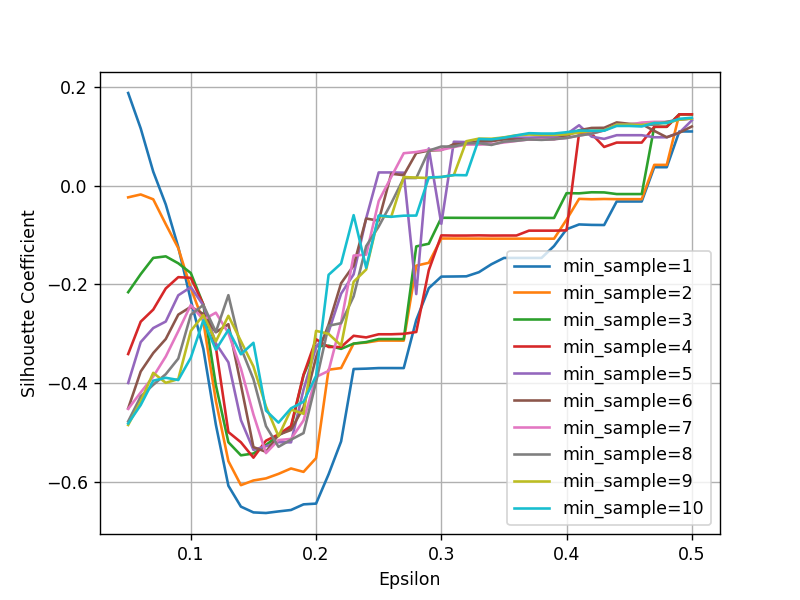

In [6]:
# Plot lines (x axis = epsilon, y axis = Silhouette Coefficient')
plt.figure()

# Draw multiple lines
for i in all_scores:
    plt.plot(epsilons, i)

# Labeling
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend(['min_sample=1', 'min_sample=2','min_sample=3', 'min_sample=4', 
           'min_sample=5', 'min_sample=6', 'min_sample=7', 'min_sample=8', 'min_sample=9', 'min_sample=10'])
plt.grid(True)
plt.show()

## Findings
1. In every case of minimum sample except minimum sample = 1, Silhouette Coefficients were the lowest between 0.1 and 0.2,
   and the highest in between 0.4 and 0.5.
1. in low epsilons (e < 0.1), low mininum samples were associated with high Silhouette Coefficient
2. in epsilons over 0.1, high minimum samples were associated with high Silhouette Coefficient

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

## 2-A. Preprocessing Data: Heart Failure Clinical Records
- This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.
https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In [7]:
#Load Dataset as 'df'
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
#sort three non-binary value columns for clustering as 'df2'
df2 = df[['age', 'serum_sodium', 'ejection_fraction']]
df2.describe()

,age,serum_sodium,ejection_fraction
count,299.000000,299.000000,299.000000
mean,60.833893,136.625418,38.083612
std,11.894809,4.412477,11.834841
min,40.000000,113.000000,14.000000
25%,51.000000,134.000000,30.000000
50%,60.000000,137.000000,38.000000
75%,70.000000,140.000000,45.000000
max,95.000000,148.000000,80.000000


In [9]:
#Normalize dataset as 'df3'
df3 = (df2 - df2.mean()) / df2.std()
df3.describe()

,age,serum_sodium,ejection_fraction
count,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.465713e-16,-8.703554e-16,8.911489e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.751511e+00,-5.354230e+00,-2.034976e+00
25%,-8.267382e-01,-5.949987e-01,-6.830351e-01
50%,-7.010562e-02,8.489153e-02,-7.064906e-03
75%,7.705972e-01,7.647817e-01,5.844090e-01
max,2.872354e+00,2.577822e+00,3.541779e+00


## 2-B. Run DBSCAN and plot the results

In [10]:
#set minimum samples and epsilons similar as assignment 1
#minimum samples >= 4 led to a single label, so set minimum samples from 1 to 3.
min_samples2 = np.arange(1, 4)
epsilons2 = np.arange(0.1, 0.51, 0.01)

In [11]:
#generate scores using 'for' loop
all_scores2 = []
for min_sample in min_samples2:
    
    scores = []
    for epsilon in epsilons2:
        
        # define DBSCAN function
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        df3.cluster = dbscan.fit_predict(df3)
        
        # calculate silouette scores
        score = metrics.silhouette_score(df3, df3.cluster)
        
        scores.append(score)
        
    all_scores2.append(scores)

C:\Users\kcosm\AppData\Local\Temp\ipykernel_63896\210914201.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df3.cluster = dbscan.fit_predict(df3)


<IPython.core.display.Javascript object>


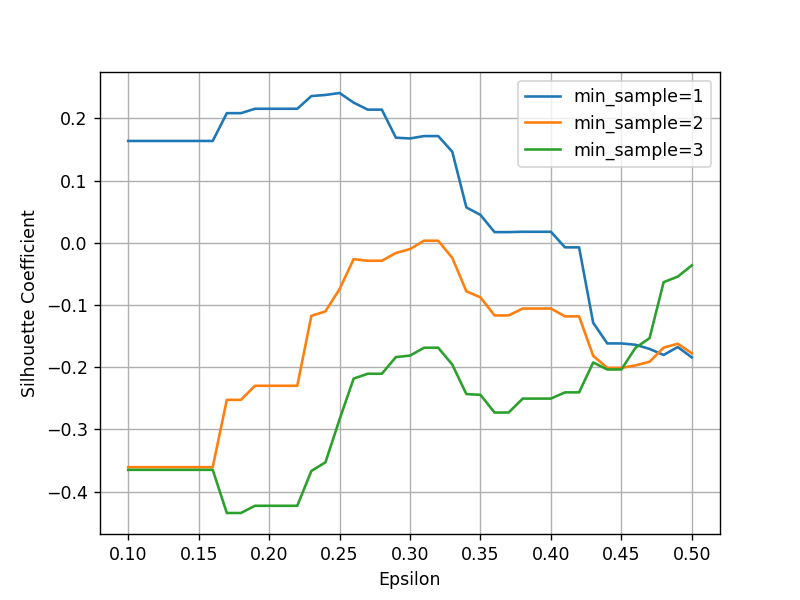

In [12]:
# Plot lines (x axis = epsilon, y axis = Silhouette Coefficient')
plt.figure()

# Draw multiple lines
for i in all_scores2:
    plt.plot(epsilons2, i)
    
# Labeling
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend(['min_sample=1', 'min_sample=2','min_sample=3'])
plt.grid(True)
plt.show()

In [13]:
# How many clusters in Optimal points for minimum_samples = 1?
dbscan = DBSCAN(eps=0.25, min_samples=1)
df3.cluster = dbscan.fit_predict(df3)
len(np.unique(df3.cluster))

205

In [14]:
# How many clusters in Optimal points for minimum_samples = 2?
dbscan = DBSCAN(eps=0.32, min_samples=2)
df3.cluster = dbscan.fit_predict(df3)
len(np.unique(df3.cluster))

49

In [15]:
# How many clusters in Optimal points for minimum_samples = 3?
dbscan = DBSCAN(eps=0.50, min_samples=3)
df3.cluster = dbscan.fit_predict(df3)
len(np.unique(df3.cluster))

8

## Findings for 2-B
- Although low minimum samples(1, 2) showed higher scores than 3 minimum samples in epsilon under 0.45, the amount of clusters was excessive and thus did not provide meaningful outcome.
- In optimal point of 3 minimum samples, the amount of clusters was 8 and thus would be more meaningful outcome.

## 2-C. 3D Plot for optimal configuration

- Axed3D function did not work properly
- Therefore, I used 3D scatterplot referring to matplotlib guide: https://matplotlib.org/stable/plot_types/3D/scatter3d_simple.html#sphx-glr-plot-types-3d-scatter3d-simple-py 

<IPython.core.display.Javascript object>


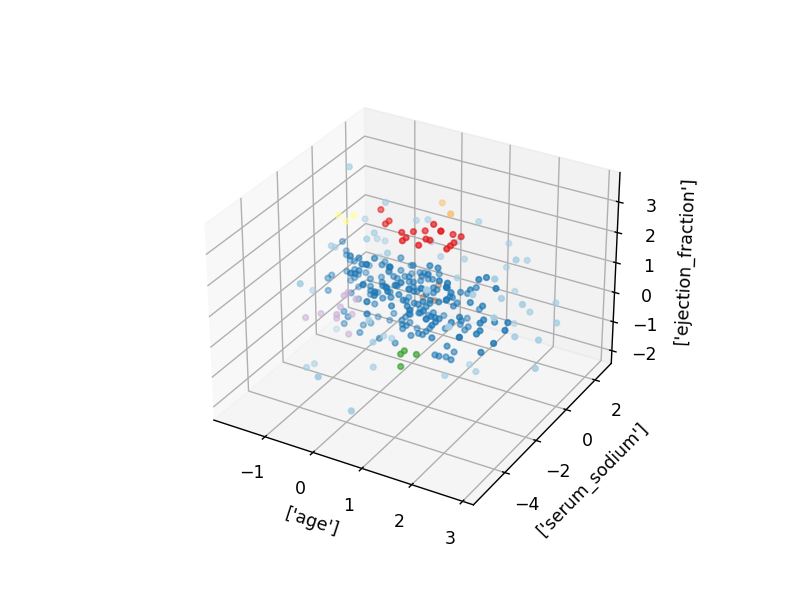

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df3['age'], df3['serum_sodium'], df3['ejection_fraction'], c=df3.cluster, s=10, cmap = 'Paired')

ax.set(xlabel=['age'], ylabel=['serum_sodium'], zlabel=['ejection_fraction'])
plt.show()

## 2-D(Bonus). use PCA to condense 3D data

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df3_r = pca.fit(df3).transform(df3)

In [18]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.39217475 0.34234826]
